#Understanding friction kernels and Laplace transforms
What follows is just an attempt to understand friction kernels and their Laplace transforms for simple functions a little better. We start from a simple exponential function and follow with other relevant examples.

In [1]:
%load_ext autoreload
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colors = ['orange', 'red', 'blue', 'cyan']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###Exponential decay
The Laplace transform of an exponential function

$y = \exp(-ax)$

can be simply written as

$\mathcal{L}[y](s)= 1/(s+a)$

Hence if we have a friction kernel $\zeta(t)$  that is an exponential function, then we would have that the zero frequency friction 

$\zeta(0)=\int_0^{\infty}\zeta(t)dt = -1/a\exp(-at)\bigg]_0^\infty=1/a$

This is the same result that we obtain from the Laplace transform itself.

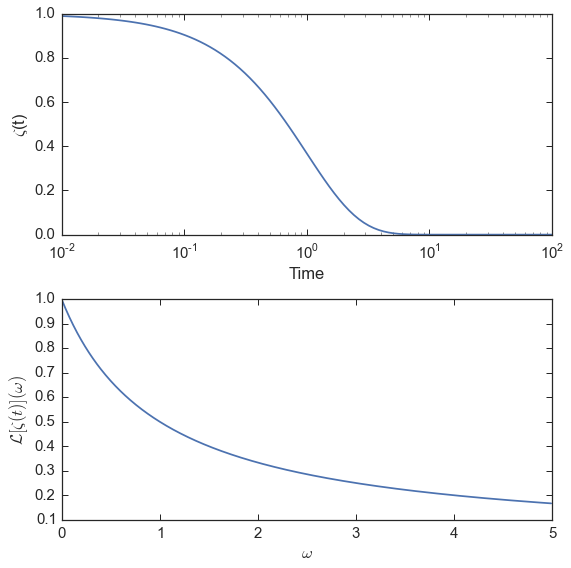

In [31]:
freq = np.arange(0,5,0.01)
time = np.logspace(-2,2,100)
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(time,np.exp(-time))
ax[0].set_xscale('log')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$\zeta$(t)')
ax[1].plot(freq,1./(freq+1))
ax[1].plot(0,1,'x')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$\mathcal{L}[\zeta(t)](\omega)$')
plt.tight_layout()

### Squared exponential
For a squared exponential, the solution is much more complicated. If we have a function of the type

$y = \exp(-x^2)$

then the Laplace transform can be written as

$\mathcal{L}[y](s)=\exp(s^2/4a)\sqrt{\pi}\mathrm{Erfc}[s/2\sqrt{a}]/(2\sqrt{a})$

Below I show a numerical example for the case of a friction kernel $\zeta(t)=\exp(-t^2)$

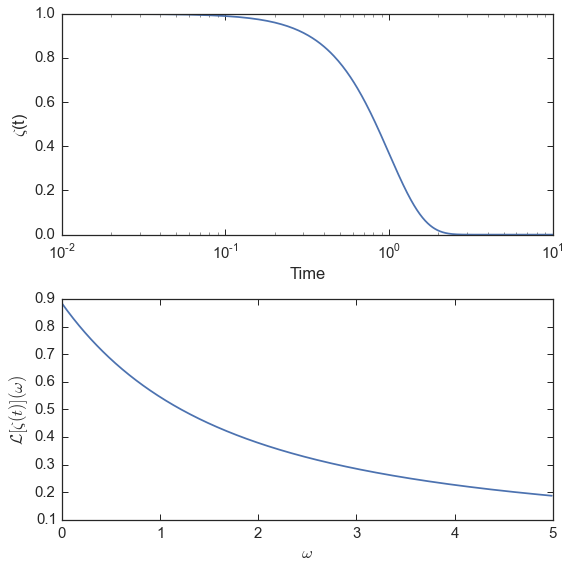

In [49]:
from scipy.special import erfc
def laplace_exp2(x):
    return math.sqrt(math.pi)/2.*np.exp((x**2)/4.)*erfc(x/2.)
freq = np.arange(0,5,0.01)
time = np.linspace(0,10,1000)
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(time,np.exp(-time**2))
ax[0].set_xscale('log')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$\zeta$(t)')
ax[1].plot(freq,laplace_exp2(freq))
#ax[1].plot(0,1,'x')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$\mathcal{L}[\zeta(t)](\omega)$')
plt.tight_layout()

Again, as we can see from the intercept, the value of $\mathcal{L}[\zeta](0)$ from the Laplace transform equation is the same as that from the numerical integral:

In [47]:
print "Integral : %g"%np.trapz(np.exp(-time**2), time)
print "Laplace : %g"%laplace_exp2(0)

Integral : 0.886227
Laplace : 0.886227


### Sum of an exponential and a non-exponential decay
What we use in our paper looks more like the sum of an exponential and squared exponential. Let's make an example assuming that our function of interest is $y=a\exp(-x) + (1-a)\exp(-x^2)$. For ilustrative purposes we will use $a=0.1$. 

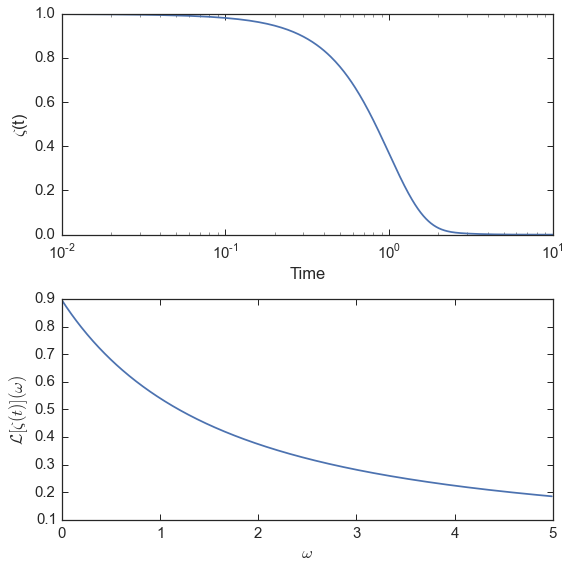

In [54]:
a = 0.1
freq = np.arange(0,5,0.01)
time = np.linspace(0,10,1000)
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(time,a*np.exp(-time) + (1-a)*np.exp(-time**2))
ax[0].set_xscale('log')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$\zeta$(t)')
ax[1].plot(freq,a*1/(freq+1) + (1-a)*laplace_exp2(freq))
#ax[1].plot(0,1,'x')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$\mathcal{L}[\zeta(t)](\omega)$')
plt.tight_layout()

Again we test whether we obtain good agreement between the direct calculation and the expresion for the Laplace transform.

In [53]:
print "Integral : %g"%np.trapz(a*np.exp(-time) + (1-a)*np.exp(-time**2), time)
print "Laplace : %g"%(a + (1-a)*laplace_exp2(0))

Integral : 0.897601
Laplace : 0.897604
